<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/Informe_n%C3%BAmero_3_MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Problema del subarreglo máximo

Para definir el problema del subarreglo máximo, es preciso primero presentar un ejemplo.

### Ejemplo:

>Una lotería ofrece como premio un pozo de dinero que varía su valor a lo largo de la semana. 

![image](https://cdn.discordapp.com/attachments/838249461268217916/1012164596435521587/Diseno_sin_titulo_1.png)

El subarreglo, correspondiente a la fluctuación del monto es entonces:

$[50, -65, 40, -35, 25, 10]$

Cada casilla representa el día y la cuantificación de una subida o bajada de el monto.

> **Se busca encontrar el par de días consecutivos donde la ganancia sea máxima y la pérdida mínima**. En este caso, donde se gane más el primer día para invertirlo y perder el mínimo dinero posible al siguiente a causa de la devaluación de la moneda. 

Es entonces donde entra la solución al **subarreglo máximo**, donde, dado un arreglo **se busca el subarreglo cual contenga la suma de mayor valor**. En este caso La solución es $[25, 10]$ día 6 y 7, ya que se buscan 2 días contiguos y en el caso  hipotético de no lograr invertir todo el dinero el mismo día de la entrega, al siguiente las pérdidas serán mínimas en comparación a otro subarreglo.

Además del dicho ejemplo, otras aplicaciones importantes del subarreglo máximo son:

1.- Análisis de secuencias genómicas.

>El análisis de secuencias genómicas emplea algoritmos de subarreglos máximos para identificar segmentos biológicos importantes de secuencias de proteínas.

2.- Visión por computadora.

>En visión por computadora , los algoritmos de subarreglo máximo se utilizan en imágenes de mapa de bits para detectar el área más brillante en una imagen.






# 2.- MaxSubArray recursivo

# 2.1. Código

In [110]:
import random
from termcolor import colored

iterator = 1
def MaxSubArrayMid(arr, izq, med, der, verbose = False):
    global iterator
    sum = 0
    izq_sum = -10000
    izq_index = -1
    if (verbose == True):
      print(colored("------------------------","green"),colored(f"iteración {iterator}","green"),colored("------------------------","green"))
      iterator=iterator+1
      print(colored("# Se recibe el arreglo ","green"), a[izq:der+1],"\n")
    
    
    for i in range(med, izq-1, -1):
        sum = sum + arr[i]
        if (sum > izq_sum):
            izq_sum = sum
            izq_index = i
    if (verbose == True):
      print(colored("# Su subarreglo izquierdo corresponde a:","red"), a[izq:med+1])
      print(colored("# Su subarreglo izquierdo MÁXIMO es", "red"),a[izq_index:med+1])
      print(colored("# Su suma corresponde a =", "red"),izq_sum,"\n")
    

    sum = 0
    der_sum = -1000
    der_index = -1
    for i in range(med, der + 1):
        sum = sum + arr[i]
        if (sum > der_sum):
            der_sum = sum
            der_index = i
    if (verbose == True):
      print(colored("# Su subarreglo derecho corresponde a","yellow"), a[med: der+1])
      print(colored("# Su subarreglo derecho MÁXIMO es", "yellow"),a[med:der_index+1])
      print(colored("# Su suma corresponde a =", "yellow"),der_sum,"\n")



  
    
    med_sum = izq_sum + der_sum - arr[med]
 
    if(med_sum > der_sum and med_sum > izq_sum): return (izq_index, der_index, med_sum)
    elif (der_sum > izq_sum): return (med , der_index, der_sum)
    else: return (izq_index, med, (izq_sum))
    

def maxSubArray(arr, izq, der, verbose = False):
      if izq == der: return (izq, der, arr[izq])
      med = (izq + der) // 2 
      
      (izq_start, izq_finish, max_lef) = maxSubArray(arr, izq, med, verbose)
      (der_start, der_finish, max_der) = maxSubArray(arr, med+1, der, verbose)
      (med_start, med_finish, max_mitad) = MaxSubArrayMid(arr, izq, med, der, verbose)

      if max_der > max_lef and max_der > max_mitad: 
        return (der_start, der_finish, max_der)
      elif max_lef > max_mitad and max_lef > max_der: 
        return (izq_start, izq_finish, max_lef)
      else : 
        return (med_start, med_finish, max_mitad)

a = random.sample(range(-100, 100), 12)
print(colored("# Input Inicial: ", 'green'), a)
(inicio, final, suma) = maxSubArray(a, 0, len(a)-1,verbose = False)
print(colored("# Subarreglo maximo: ", 'green'), a[inicio:final+1])
print(colored("# La suma es: ", 'green'), suma)

# Input Inicial:  [67, -59, -79, 27, 4, 48, -19, 76, 92, -43, -35, -80]
# Subarreglo maximo:  [27, 4, 48, -19, 76, 92]
# La suma es:  228


# 2.2. Descripción del algoritmo



**Paradigma utilizado:** Divide y vencerás.

El algortimo utilizado, encuentra un subarreglo **contiguo** de tal manera que la suma de sus elementos sea máxima.

Se siguen los siguientes pasos para el algoritmo:

>1.- Divide el arreglo en dos mitades.

>2.- Retorna el máximo (mayor) de los siguientes datos:

* max_lef, máxima suma de la mitad izquierda.
* max_rig, máxima suma de la mitad derecha
* max_mitad, máxima suma del subarreglo que cruza el punto medio.

Una vez la función es invocada, se comprueba inmediatamente si el arreglo contiene un solo dato, `if izq == der:`, si se cumple se retorna entonces el único valor presente. Luego se secciona el arreglo en una mitad izquierda y una mitad derecha. El siguiente paso consiste en la invocación recursiva de la función `MaxSubArray()` para calcular el sub arreglo máximo de cada mitad. Por siguiente paso de invoca a `MaxSubArrayMid()`, función que calcula el máximo del subarreglo que pasa por la mitad.

![images (1).png](https://cdn.discordapp.com/attachments/838249461268217916/1012608979039440996/images_1.png)

Para el cálculo del subarreglo que pasa por el punto medio se toman en cuenta las casillas contiguas en la división media, dichas casillas estarán de manera intrísnseca en el subarreglo mencionado.

![image](https://cdn.discordapp.com/attachments/838249461268217916/1012625692611072070/asdasdsda.jpg)

Desde los elementos resaltados en la imágen se procede a iterar al extremo de la izquierda en `for i in range(med, izq-1, -1)`para encontrar el subarreglo máximo de dicha mitad, se repite lo mismo para la derecha en `for i in range(med, der + 1)`. Luego de dicho proceso, se suman los 2 máximos obtenidos en los anteriores procesos, para finalmente obtener la suma máxima correspondiente al subarreglo que pasa por el punto medio.

Luego de calculado cada máximo de cada parte por separado se procede entonces a establecer cual es el subarreglo cuya suma sea máxima y así darle solución al problema. Esto a través de distintas comparaciones que permitirán establecer cual es el orden en el cual los datos deben de ser retornados.

Finalmente, se imprime la suma máxima junto con el subarreglo obtenido.











# 2.3. Ejemplo

Se tiene el siguiente arreglo $[-3,-10,7,2,4,-5]$

imágen confeccionada en canvas.

![image](https://cdn.discordapp.com/attachments/838249461268217916/1013289231524843520/asasasasasas_1_60.jpg)

* El subarreglo máximo contiguo del lado izquierdo corresponde a 7.
> como es visible en la imágen, la suma entre -3 y 7 es menor a 7 por si solo, por lo que se establece como el subarreglo mayor.
* El subarreglo máximo contiguo del lado derecho corresponde a 6.
> Correspondiente a la suma del sub arreglo $[2,4]$, si se sumara el -5, se disimiuye el número.
* El subarreglo máximo que pasa por el punto medio corresponde a 13.
> La suma entre el subarreglo máximo derecho e izquierdo, que pasa por el punto medio.
* Por lo tanto, la suma del subarreglo máximo corresponde a 13.
>El sub arreglo máximo a su vez corresponde a $[7,2,4]$
>




### **Un ejemplo dentro del código implementado con el mismo arreglado utilizado recientemente.**

In [111]:
iteraciones = 1

a = [-3,-10,7,2,4,-5]
verbose = True
if (verbose == True): 
  print(colored(" ## Para la izquierda se usará el color", "blue"),colored("ROJO", "red"), colored("para la derecha se usará el color","blue"), colored("AMARILLO","yellow"),"\n")
print(colored("# Input Inicial: ", 'green'), a)
(inicio, final, suma) = maxSubArray(a, 0, len(a)-1,verbose = True)
print(colored("# Subarreglo maximo: ", 'green'), a[inicio:final+1])
print(colored("# La suma es:", 'green'), suma)

 ## Para la izquierda se usará el color ROJO para la derecha se usará el color AMARILLO 

# Input Inicial:  [-3, -10, 7, 2, 4, -5]
------------------------ iteración 1 ------------------------
# Se recibe el arreglo  [-3, -10] 

# Su subarreglo izquierdo corresponde a: [-3]
# Su subarreglo izquierdo MÁXIMO es [-3]
# Su suma corresponde a = -3 

# Su subarreglo derecho corresponde a [-3, -10]
# Su subarreglo derecho MÁXIMO es [-3]
# Su suma corresponde a = -3 

------------------------ iteración 2 ------------------------
# Se recibe el arreglo  [-3, -10, 7] 

# Su subarreglo izquierdo corresponde a: [-3, -10]
# Su subarreglo izquierdo MÁXIMO es [-10]
# Su suma corresponde a = -10 

# Su subarreglo derecho corresponde a [-10, 7]
# Su subarreglo derecho MÁXIMO es [-10, 7]
# Su suma corresponde a = -3 

------------------------ iteración 3 ------------------------
# Se recibe el arreglo  [2, 4] 

# Su subarreglo izquierdo corresponde a: [2]
# Su subarreglo izquierdo MÁXIMO es [2]
# Su sum

Finalmente, y como indica el ejemplo en forma gráfica, la cantidad de pisos correponde a la cantidad de iteraciones que necesita el algoritmo para resolver el problema.

# 3.- Tiempo de ejecución

**Paradigma** : Divide y vencerás.

La complejidad temporal correspondiente al algortimo es $O(n Log n)$ correspodindo. Debido a que la parte recursiva del algoritmo `MaxSubArray(arr)` divide constantemente el arreglo generando varias instancias de problemas más pequeños, $log n$ corresponde a la cantidad máxima de divisiones en un arreglo de $n$ elementos, su complejidad temporal es de manera individual $O(Log n)$, luego, la complejidad de la función `MaxSubArrayMid(arr,half)` es lineal, por lo que su complejidad corresponde a $O(n)$.

Debido a la naturaleza recursiva no posee un mejor ni mejor caso.

Puede expresarse mediante la siguiente relación de recurrencia. 

> T(n) = 2T(n/2) + Θ(n) 



# 4.- Correctitud

## MaxSubArrayMid

## **Teorema (Correctitud).**

*La función MaxSubArrayMid dentro del código MaxSubArray recibe el arreglo $A=[a_1,a_2,...,a_n]$ sin un orden especifico*. 

Esta función se encarga de encontrar el subarreglo máximo $B=[a_i,a_{i+1}, a_{i+2},...,a_j]$ tal que $1 \leq i \leq j \leq n$ con i,j constantes.

Y teniendo $1 \leq k \leq l \leq n$ siempre debe cumplirse ${\displaystyle \sum _{x=k}^{l}A[x]} \leq {\displaystyle \sum _{x=i}^{j}A[x]}$.

## **Prueba del Teorema**

Probaremos la siguiente propiedad invariante de bucle para la función `MaxSubArrayMid`:

>Al finalizar de cada iteración $i$ del bucle, el subarreglo máximo retornado contendrá entre sus elementos el elemento que se encuentra en la mitad del arreglo recibido.

### **Inicialización**

La función MaxSubArrayMid recibe el arreglo A = $[a_1, ..., a_n]$ donde $n=2$ en su primera iteración.

>

El arreglo solo contiene $2$ elementos, la mitad del arreglo seria la posición $med=0$.

>

En este caso la suma del subarreglo izquierdo (incluyendo el elemento de la mitad) seria $izq_{sum} = A[med]$, mientras que la suma del subarreglo derecho (incluyendo el elemento de la mitad) seria $der_{sum} = A[med] + A[med+1]$.

>

La suma del el medio siempre será $izq_{sum} + der_{sum} - A[med]$
 se le resta el elemento de la mitad porque ambas sumas lo contienen. En este caso el subarreglo derecho es el mismo que el subarreglo con la mitad, es decir, $B=[A[0], A[1]]$.

> Si los elementos en el arreglo recibido son positivos,`MaxSubArrayMid `retorna el arreglo original (su suma e índices), ya que su suma seria la mayor. Podría retornar el subarreglo derecho o el del medio ya que son lo mismo en este caso.

>Si el elementos $A[0]$ es el único positivo del array, entonces retornara el subarreglo izquierdo (su suma e índices).

>Si el arreglo contiene solo elementos negativos, entonces retornara el subarreglo izquierdo (su suma e índices), ya que su suma será menor a la suma de $A[0] + A[1]$ en el caso de que ambos sean negativos. 

### **Mantención**

MaxSubArrayMid recibe el arreglo A = $[a_1, ..., a_n]$ donde $n = 4$.

El arreglo contiene $4$ elementos, la mitad del arreglo seria la posición $med=1$. En este caso tenemos lo siguiente:

La suma del subarreglo izquierdo (incluyendo el elemento de la mitad) seria 
$(izq_{sum} = \displaystyle \sum _{k=i}^{med} A[k])$ con $(izq \leq i \leq med)$
 El subarreglo izquierdo seria $B = [c_med, ..., c_{j-1}, c_j]$.

 La suma del el subarreglo de en medio siempre será $izq_{sum} + der_{sum} - A[med]$ y el subarreglo del medio siempre sera $A[i:j+1]$.

 > si $izq_{sum} > 0$ y $der_{sum} > 0$entonces entonces `MaxSubArrayMid` retorna el subarreglo de en medio (su suma e índices), ya que su suma seria la mayor.

 > si $izq_{sum} < 0$ y $der_{sum} > 0$ entonces `MaxSubArrayMid` retorna el subarreglo de la derecha (su suma e índices), ya que su suma seria la mayor.

 >Si $izq_{sum} > 0$ y $der_{sum} < 0$ entonces `MaxSubArrayMid` retorna el subarreglo de la izquierda (su suma e índices), ya que su suma seria la mayor.

 >Si $izq_{sum} < 0$ y $der_{sum} > 0$ entonces `MaxSubArrayMid`:
 * Si $izq_{sum} > der_{sum}$ retorna el subarreglo de la izquierda (su suma e índices), ya que su suma seria la mayor.
 * Si $der_{sum} > izq_{sum}$ retorna el subarreglo de la derecha (su suma e índices), ya que su suma seria la mayor.

### **Correctitud**

La correctitud del `MaxSubArrayMid` es evidente, ya que a pesar de que enviara uno de 3 subarreglos que crea la función, el elemento de la mitad del arreglo siempre se encontrara en los $3$ subarreglos, `MaxSubArrayMid` está diseñado para que así sea, e independientemente del subarreglo retornado, siempre contendrá el elemento de la mitad del arreglo recibido.




# MaxSubArray

### **Teorema (Correctitud).**
* El algoritmo MaxSubArray genera un arreglo: $[a_{i},a_{i+1},...,a_j]$ siendo $1 \leq i \leq j \leq n$ con los elementos contiguos que sumados dan el mayor numero posible con los elementos del arreglo $[a_{1},a_{2},...,a_n]$ recibido.

Para probar la correcitud de MaxSubAarray se utilizará inducción matemática devido al a recursividad del algoritmo.

### **Prueba del Teorema**

> En **inducción matemática**, para probar una declaración p(n) para todos los números naturales n, típicamente se debe:
1. Porbar $P(n)$ para un caso baso, por ejemplo $P(1)$ 
2. Probar que si $P(m)$ es cierto para $m < n$ entonces $P(n)$ tambien lo es.

El toerema indica que `MaxSubArray` retorna el máximo subarreglo posible de formas con los elementos contiguos de la secuencia de $n$ elementos de entrada.




### **Caso Base**

Se prueba el caso base $P(1)$.

Cuando MaxSubArray recibe una secuencia de 1 elementos, la retorna inmediatamente. Es posible comprobar que el teorema se cumple de manera exitosa en este caso, ya que, si solo se tiene 1 elemento de la secuencia, el subarreglo máximo es el único elemento de la secuencia.

### **Caso cualquiera**

Se probará como caso cualquiera $P(n)$.

Para la secuencia de n elementos, MaxSubArray divide el arreglo en 2 subarreglos de secuencias $m$ y $p$, tal que $m=\lfloor \frac{n}{2}\rfloor$ y $p =\lfloor \frac{n}{2}\rfloor$ y consigue que los subarreglos máximos de cada subarreglo formado usando MaxSubArray `(debido al a recurisividad, llegegará un momento en el que aplique MaxSubaArray en el caso base, donde retornará correctamente un subarreglo máximo de 1 elemento)`. Como $m < n$ y $p < n$ es posible asumir inductivamente que se encontrará a los subarreglos máximos de ambas mitades.

Luefo se consigue un subarreglo máximo que contenga el elemento unbicado en la mirad del arreglo utilizando la función **MaxSubArrayMid**, cuya correctitud fue probada previamente y devuelve efectivamente el subarreglo máximo que es posible formas conteniendo el elemento de la mitad del arreglo.

Una vez obtenido 3 subarreglos máximos `(los 2 de cada mitad y el que el elemento en la mitad del arreglo está contenido)` la función **MaxSubArrayMid** decida y retorna el subarreglo cuya suma sea máxima.

Por lo tanto, la función **MaxSubArrayMid** es correcta.

### **Conclusión**

El teorema fue efectivamente comprobado como correcto para un caso base y para un caso cualquiera, es decir, el algoritmo **MaxSubArray**, al comprobarlo con inducción matemática es correcto.

# 5.- Experimentos

A continuación se realizarán experimentos los cuales incluyen investigar:

* Comparar los tiempos entre la implementacion realizada y un MaxSubArray que utilice el Algoritmo de Kadane.
* Comparar los tiempos entre la implementación realizada y un algoritmo que utilice el paradigma de fuerza bruta.
* Comparar los tiempos entre la implementación por Kadane, divide y vencerás y un algoritmo que utilice le paradigma de fuerza bruta.

Se utilizarán datos de tamaño $n \in [5,99]$

Los elementos de los arreglos generados estarán compuestos por números que van desde el 1 al 100.


#  5.1. MaxSubArray divide y vencerás Vs Kanade **(Tiempo de ejecución)**

### Implementación kanade:

In [112]:
import random

def kadane(MyList):
  max_sum = 0
  current_sum = 0

  max_start = 0
  max_end = 0
  current_start = 0
  current_end = 0

  for i in range(len(MyList)): 
    current_sum = current_sum + MyList[i]
    current_end = i
    if current_sum < 0:
      current_sum = 0
      current_start = current_end + 1

    if max_sum < current_sum:
      max_sum = current_sum
      max_start = current_start
      max_end = current_end
  
MyList = random.sample(range(-100, 100), 7)
kadane(MyList)

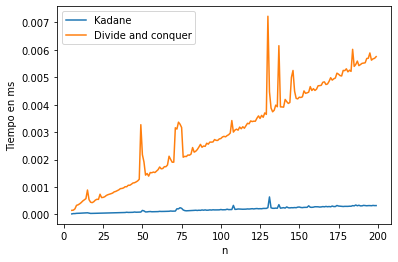

In [115]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat
x=[]; y=[] ; y1=[] ; verbose = False
for n in range(5,200):
    a = random.sample(range(1, 1000), n)
    #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{0},{len(a)-1},{verbose})", repeat=1, number=10)
    x.append(n)
    y.append(t)
    y1.append(t1)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Kadane","Divide and conquer"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Análisis resultados

Se establece. 
> Complejidad temporal Kanade: $O(n)$

> Complejidad temporal "Divide y vencerás": $O(n log n)$

Se puede observar una diferencia muy notoria en los tiempos de ejecución de cada algoritmo. La explicación del por qué tan notoria diferencia requiere presentar la manera en la que están implementados ambos algoritmos.

 Por un lado "Divide y vencerás" como indica su nombre, contiene una función de complejidad logarítmica que divide constantemente un problema y los tansforma en subproblemas más pequeños, a su vez, requiere de otra función que realiza la acción de establecer los arreglos máximos, esta última siendo de complejidad lineal.

 >Divide y vencerás:

![image](https://cdn.discordapp.com/attachments/838249461268217916/1012975985001504830/Dividir.png)

Luego, Kadane se compone de una sola función de complejidad lineal, por lo que internamente no invoca a ninguna otra. Tampoco requiere llamadas recursivas, una vez es invocada resuelve el problema directamente.

> Kanade:

![image](https://cdn.discordapp.com/attachments/838249461268217916/1012976888412635176/Dividir_1.png)

Es correcto decir entonces que el algoritmo Kanade es notoriamente más eficiente debido a que evita pasos y simplifica el problema sin dividirlo recursivamente, por lo que su crecimiento según la cantidad de datos es realentizado, es de destacar también, el hecho de que el algoritmo Kanade presenta una estabilidad mucho mayor respecto a "Divide y vencerás". 

>Las anomalías (montes, picos), son provocadas por problemas de comunicación con el servidor, inestabilidades en el algoritmo o propiamente algún voltaje anormal del procesador. Los montes pronunciados tienden a ser una conjunción de estos comportamientos anormales.



# 5.2. MaxSubArray divide y vencerás Vs fuerza bruta **(Tiempo de ejecución)**
### Implementación MaxSubArray por fuerza bruta:

In [7]:
from itertools import combinations


def max_sum_bf(arr):
  
    n = len(arr)
    candidates = combinations(range(n + 1), 2)

    def arr_sum(x):
  
        i, j = x
        return sum(arr[i:j])

    return max(candidates, key=arr_sum)


max_sum_bf([-2, 1, -3, 4, -1, 2, 1, -5, 4])

(3, 7)

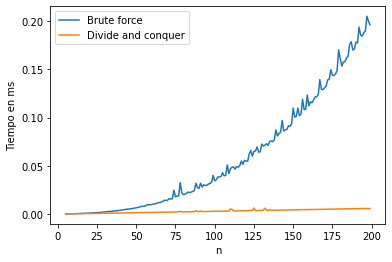

In [118]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y=[] ; y1=[] ; verbose = False
for n in range(5,200):
    a = random.sample(range(1, 1000), n)
    #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import max_sum_bf", stmt=f"max_sum_bf({a})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{0},{len(a)-1},{verbose})", repeat=1, number=10)
    x.append(n)
    y.append(t)
    y1.append(t1)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Brute force","Divide and conquer"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Análisis resultados

Se establece. 
> Complejidad temporal "Fuerza bruta": $O(n^3)$


> Complejidad temporal "Divide y vencerás": $O(n log n)$

Tal como indica el nombre de "fuerza bruta", consiste en un algoritmo simple que, sin importar la optimización, resuelve el problema propuesto. Por ende la complejidad temporal presente en dichos algortimos que utilizan este paradigma tiende a ser alta. En este caso es cúbica.

Para el presente situación, la función que indica a los candidatos a posible subarreglo máximo tiene complejidad cuadrática, luego dentro de la misma función se procede a sumar a los candidatos, dicha función de complejidad lineal.

![image](https://cdn.discordapp.com/attachments/838249461268217916/1013178661685448835/Dividir.jpg)

Tal como se indicó en imágenes anteriores, "Divide y vencerás" solo requiere de una función de complejidad logaritmica en conjunto a otra de complejidad lineal. haciendo por ende que los resultados en general de este experimento sean predecibles.





# 5.3. Fuerza bruta Vs Kadane Vs divide y vencerás **(Tiempo de ejecución)**

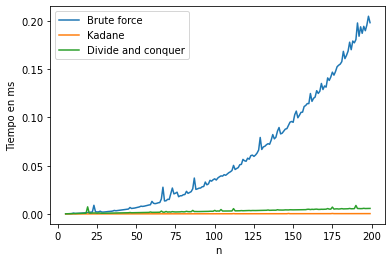

In [116]:
x=[]; y=[] ; y1=[] ; y2=[] ; verbose = False
for n in range(5,200): 
    a = random.sample(range(1, 1000), n)
    #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import max_sum_bf", stmt=f"max_sum_bf({a})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{0},{len(a)-1},{verbose})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)
    y2.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Brute force","Kadane","Divide and conquer"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Se establece.

> Complejidad temporal "Fuerza bruta": $O(n^3)$

> Complejidad temporal "Divide y vencerás": $O(n log n)$

> Complejidad temporal Kanade: $O(n)$

Como ya fue expuesto con anterioridad, la diferencia entre las complejidades temporales de los métodos presentados da pie a que los resultados de este experimento sean predecibles, aún así, es de resaltar que a pesar de que en el anterior experimento "Divide y vencerás" Vs Kanade la diferencia entre ambos era notoria. Una vez se les compara con el paradigma de "Fuerza bruta", dichas diferencias son prácticamente imperceptibles. Demostrando así la proporción de diferencias en la optimización de dichos algoritmos.